# NLP: Natrual Language Processing:

# 1-LIBRAIRIES:

In [5]:
import pandas as pd
import numpy as np
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import transformers
from transformers import pipeline
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from itertools import chain
from nltk import NaiveBayesClassifier
from nltk.stem import PorterStemmer
import gensim
import gensim.corpora as corpora
from gensim.models.coherencemodel import CoherenceModel


# 2-TextPreprocessing

**1-Lower Casing the sentence : for better comprehension**

In [8]:
sentence=' My Name is Aziz'
print(sentence.lower())

 my name is aziz


**2-removing stop words**

In [10]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
en_stopwords=stopwords.words('english')
print(en_stopwords)

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MSI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
sentence='it was too far to go to the shop and he did not want her to go'
sentence_no_stopwords=' '.join([word for word in sentence.split() if word not in en_stopwords])
print(sentence_no_stopwords)
#en_stopword.remove("did") #if you want to remove a word from the stopwords list
#en_stopword.append()      #if you want to add a stopword

far go shop want go


**3-Regular Expressions (regex):filter and sort through text**

In [13]:
import re
my_folder="C:/Desktop\notes"
print(my_folder)  #took the \n to the next line

C:/Desktop
otes


* Using raw String to deal with special characters: r"sentence" 

In [15]:
my_folder=r"C:/Desktop\notes"
print(my_folder)  #will not take the \n

C:/Desktop\notes


* re.search() : Searching through the text:  
    -span() :position   
    -match : the word found

In [17]:
result_search=re.search("pattern", r"string to contain the pattern")
print(result_search)

<re.Match object; span=(22, 29), match='pattern'>


In [18]:
result_search=re.search("hello", r"string to contain the pattern")
print(result_search)

None


* re.sub() : substitute elements from the text

In [20]:
string=r"sara was able to help me find the items i needed quickly"
new_string=re.sub("sara","sarah",string)
print(new_string)

sarah was able to help me find the items i needed quickly


In [21]:
customer_reviews=['sam was a great help to me in the store', 
 'the cashier was very rude to me, I think her name was eleanor', 
 'amazing work from sadeen!', 
 'sarah was able to help me find the items i needed quickly', 
 'lucy is such a great addition to the team', 
 'great service from sara  she found me what i wanted']


sarahs_reviews = []
pattern_to_find = r"sarah?"
for string in customer_reviews :
    if( re.search(pattern_to_find,string)):
        sarahs_reviews.append(string)
print("** sarahs_reviews : ",sarahs_reviews)

a_reviews= []
pattern_to_find=r"^a"
for string in customer_reviews :
    if (re.search(pattern_to_find,string)):
        a_reviews.append(string)
print("** a_reviews : ",a_reviews)

y_reviews=[]
pattern_to_find=r"y$"
for string in customer_reviews :
    if (re.search(pattern_to_find,string)):
        y_reviews.append(string)
print("** y_reviews :",y_reviews)

needwant_reviews=[]
pattern_to_find=r"(need|want)ed"
for string in customer_reviews :
    if (re.search(pattern_to_find,string)):
        needwant_reviews.append(string)
print("** needwant_reviews : ",needwant_reviews)

no_punct_reviews = []
pattern_to_find = r"[^\w\S]"
for string in customer_reviews :
    if (re.search(pattern_to_find,string)):
        no_punct_reviews.append(string)
print("** no_punct_reviews : ",no_punct_reviews)

** sarahs_reviews :  ['sarah was able to help me find the items i needed quickly', 'great service from sara  she found me what i wanted']
** a_reviews :  ['amazing work from sadeen!']
** y_reviews : ['sarah was able to help me find the items i needed quickly']
** needwant_reviews :  ['sarah was able to help me find the items i needed quickly', 'great service from sara  she found me what i wanted']
** no_punct_reviews :  ['sam was a great help to me in the store', 'the cashier was very rude to me, I think her name was eleanor', 'amazing work from sadeen!', 'sarah was able to help me find the items i needed quickly', 'lucy is such a great addition to the team', 'great service from sara  she found me what i wanted']


* r"sarah?" : ends with one or zero h : expls: sara/sarah
* r"^a"     : starts with a
* r"y\$"      : ends with y
* r"(need|want)ed"  : contains needed or wanted
* r"[^\w\S]      : [^:not   \w:word character(a,A,3,_)  \S:Non whitespace(a,@,1) ]

<img src="Cheatsheet-RegEx.PNG">

**4-Tokenization : converting our text to smaller units**

In [25]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize, sent_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\MSI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [26]:
sentences="Her cat's name is Luna. Her dog's name is Max"
sent_tokenize(sentences)

["Her cat's name is Luna.", "Her dog's name is Max"]

In [27]:
sentence="Her cat's name is Luna."
word_tokenize(sentence)

['Her', 'cat', "'s", 'name', 'is', 'Luna', '.']

In [28]:
word_tokenize(sentences)

['Her',
 'cat',
 "'s",
 'name',
 'is',
 'Luna',
 '.',
 'Her',
 'dog',
 "'s",
 'name',
 'is',
 'Max']

**5-stemming : standardise the text (removing suffixes , prefixes)(can sometimes remove the meaning)**
* DATA NEEDS TO BE TOKENIZED BEFORE STEMMED OR LEMMATIZED


In [30]:
connect_tokens = ['connecting', 'connected', 'connectivity' , 'connect', 'connects']
learn_tokens = ['learned', 'learning' ,'learn' ,'learns', 'learner', 'learners']
like_tokens = ['likes', 'better' , 'worse']

In [31]:
import nltk
from nltk.stem import PorterStemmer
ps = PorterStemmer()
for t in learn_tokens :
    print(t," : ",ps.stem(t))

learned  :  learn
learning  :  learn
learn  :  learn
learns  :  learn
learner  :  learner
learners  :  learner


In [32]:
for t in like_tokens :
    print(t, " : ",ps.stem(t))

likes  :  like
better  :  better
worse  :  wors


the word worse lost its meaning and became wors

**6-lemmatization : stems the words to more meaningful context (could leave more words in our database)**

In [35]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\MSI\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [36]:
lemmatizer = WordNetLemmatizer()

In [37]:
for t in connect_tokens :
    print(t," : ",lemmatizer.lemmatize(t))

connecting  :  connecting
connected  :  connected
connectivity  :  connectivity
connect  :  connect
connects  :  connects


In [38]:
for t in learn_tokens :
    print(t," : ",lemmatizer.lemmatize(t))

learned  :  learned
learning  :  learning
learn  :  learn
learns  :  learns
learner  :  learner
learners  :  learner


**7-N-GRAMS : contiguous sequences of n items (words, characters, or symbols) from a given text or corpus**

In [40]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt

In [41]:
tokens = ['the', 'rise', 'of', 'artificial', 'intelligence', 'has', 'led', 'to', 'significant', 'advancements', 'in', 'natural', 'language', 'processing', 'computer', 'vision', 'and', 'other', 'fields', 'machine', 'learning', 'algorithms', 'are', 'becoming', 'more', 'sophisticated', 'enabling', 'computers', 'to', 'perform', 'complex', 'tasks', 'that', 'were', 'once', 'thought', 'to', 'be', 'the', 'exclusive', 'domain', 'of', 'humans', 'with', 'the', 'advent', 'of', 'deep', 'learning', 'neural', 'networks', 'have', 'become', 'even', 'more', 'powerful', 'capable', 'of', 'processing', 'vast', 'amounts', 'of', 'data', 'and', 'learning', 'from', 'it', 'in', 'ways', 'that', 'were', 'not', 'possible', 'before', 'as', 'a', 'result', 'ai', 'is', 'increasingly', 'being', 'used', 'in', 'a', 'wide', 'range', 'of', 'industries', 'from', 'healthcare', 'to', 'finance', 'to', 'transportation', 'and', 'its', 'impact', 'is', 'only', 'set', 'to', 'grow', 'in', 'the', 'years', 'to', 'come']
print(tokens)

['the', 'rise', 'of', 'artificial', 'intelligence', 'has', 'led', 'to', 'significant', 'advancements', 'in', 'natural', 'language', 'processing', 'computer', 'vision', 'and', 'other', 'fields', 'machine', 'learning', 'algorithms', 'are', 'becoming', 'more', 'sophisticated', 'enabling', 'computers', 'to', 'perform', 'complex', 'tasks', 'that', 'were', 'once', 'thought', 'to', 'be', 'the', 'exclusive', 'domain', 'of', 'humans', 'with', 'the', 'advent', 'of', 'deep', 'learning', 'neural', 'networks', 'have', 'become', 'even', 'more', 'powerful', 'capable', 'of', 'processing', 'vast', 'amounts', 'of', 'data', 'and', 'learning', 'from', 'it', 'in', 'ways', 'that', 'were', 'not', 'possible', 'before', 'as', 'a', 'result', 'ai', 'is', 'increasingly', 'being', 'used', 'in', 'a', 'wide', 'range', 'of', 'industries', 'from', 'healthcare', 'to', 'finance', 'to', 'transportation', 'and', 'its', 'impact', 'is', 'only', 'set', 'to', 'grow', 'in', 'the', 'years', 'to', 'come']


In [42]:
# unigrams: n=1
unigrams = (pd.Series(nltk.ngrams(tokens, 1)).value_counts()) 
print(unigrams)

(to,)          7
(of,)          6
(the,)         4
(in,)          4
(learning,)    3
              ..
(humans,)      1
(rise,)        1
(advent,)      1
(deep,)        1
(come,)        1
Name: count, Length: 79, dtype: int64


Text(0.5, 1.0, '10 most occuring unigrams')

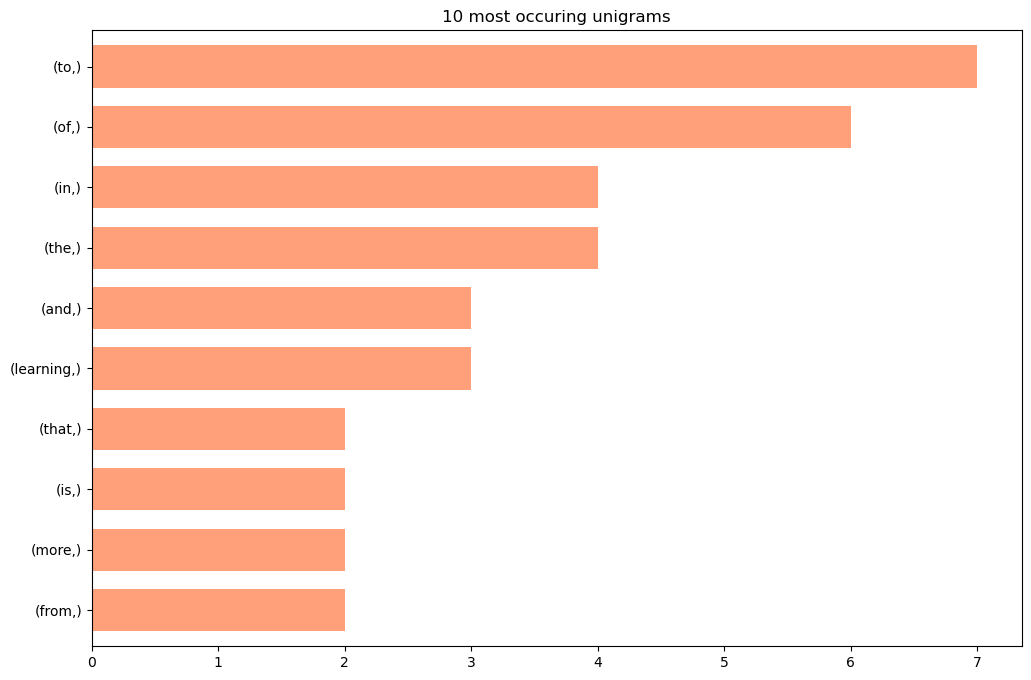

In [43]:
unigrams[:10].sort_values().plot.barh(color='lightsalmon',width=0.7, figsize=(12,8))
plt.title("10 most occuring unigrams")

In [44]:
#bigrams n=2
bigrams = (pd.Series(nltk.ngrams(tokens,2)).value_counts())
print(bigrams[:10])

(that, were)             2
(the, rise)              1
(increasingly, being)    1
(ai, is)                 1
(result, ai)             1
(a, result)              1
(as, a)                  1
(before, as)             1
(possible, before)       1
(not, possible)          1
Name: count, dtype: int64


Text(0.5, 0, '# of Occurances')

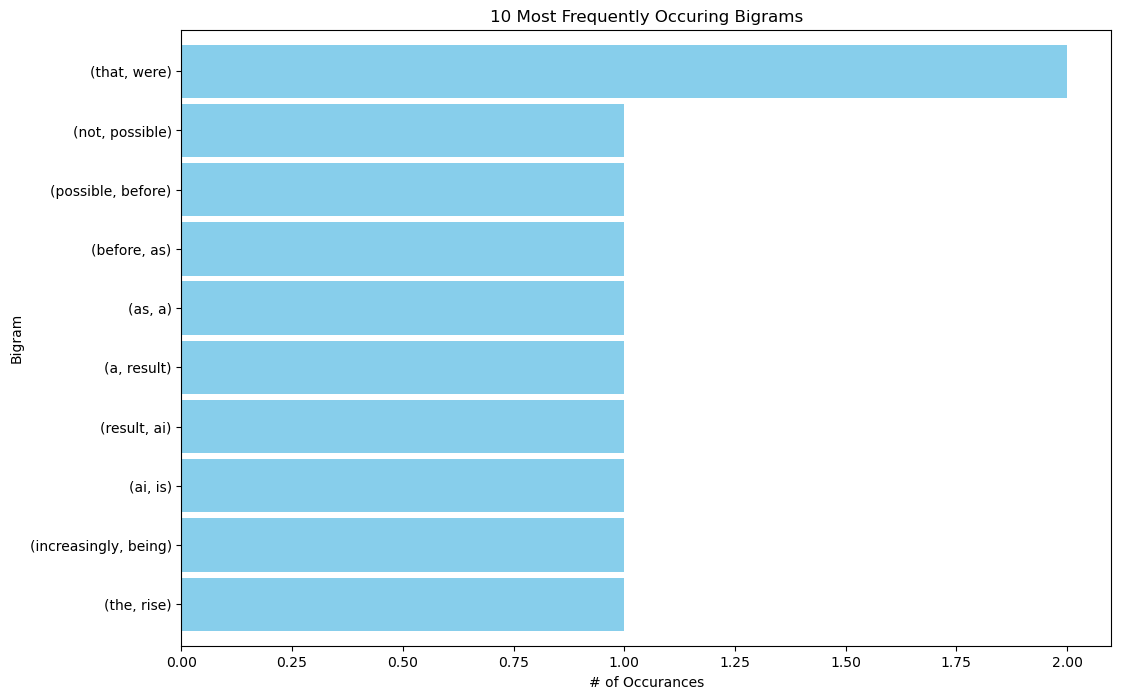

In [45]:
bigrams[0:10].sort_values().plot.barh(color='skyblue', width=.9, figsize=(12, 8))
plt.title('10 Most Frequently Occuring Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# of Occurances')

**8-EXERCICE: TEXT PREPROCESSING**

In [47]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
import re
import pandas as pd

* Load Data

In [49]:
data=pd.read_csv("tripadvisor_hotel_reviews.csv")

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  109 non-null    object
 1   Rating  109 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 1.8+ KB


In [51]:
data.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [52]:
data['Review'][0]

'nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe just noisy neighbors, aveda bath products nice, did not goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience having pay 40 parking night,  '

* LowerCase

In [54]:
data['review_lowercase']=data['Review'].str.lower()
data.head()

,Review,Rating,review_lowercase
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...
1,ok nothing special charge diamond member hilto...,2,ok nothing special charge diamond member hilto...
2,nice rooms not 4* experience hotel monaco seat...,3,nice rooms not 4* experience hotel monaco seat...
3,"unique, great stay, wonderful time hotel monac...",5,"unique, great stay, wonderful time hotel monac..."
4,"great stay great stay, went seahawk game aweso...",5,"great stay great stay, went seahawk game aweso..."


* Remove Stop Words

In [56]:
en_stopwords=stopwords.words('english')
en_stopwords.remove('not')

In [57]:
data['review_no_stopwords']=data['review_lowercase']\
                        .apply(lambda x:' '\
                               .join([word for word in x.split() if word not in en_stopwords]))
                               
data.head()                               

,Review,Rating,review_lowercase,review_no_stopwords
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,nice hotel expensive parking got good deal sta...
1,ok nothing special charge diamond member hilto...,2,ok nothing special charge diamond member hilto...,ok nothing special charge diamond member hilto...
2,nice rooms not 4* experience hotel monaco seat...,3,nice rooms not 4* experience hotel monaco seat...,nice rooms not 4* experience hotel monaco seat...
3,"unique, great stay, wonderful time hotel monac...",5,"unique, great stay, wonderful time hotel monac...","unique, great stay, wonderful time hotel monac..."
4,"great stay great stay, went seahawk game aweso...",5,"great stay great stay, went seahawk game aweso...","great stay great stay, went seahawk game aweso..."


In [58]:
data['review_no_stopwords'][0]

'nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe noisy neighbors, aveda bath products nice, not goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience pay 40 parking night,'

* Punctuation    
We want to remove punctation but we notice we have a few reviews with the symbol * instead of the word star. We want to keep this as it might add meaning to the review. We can do this using what we learned about regular expressions.

In [60]:
#change * by star
data['review_no_stopwords_no_punct'] = data \
                    .apply(lambda x: \
                           re.sub(r"[*]","star",x['review_no_stopwords'])\
                           ,axis=1)

In [61]:
data.head()

,Review,Rating,review_lowercase,review_no_stopwords,review_no_stopwords_no_punct
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,nice hotel expensive parking got good deal sta...,nice hotel expensive parking got good deal sta...
1,ok nothing special charge diamond member hilto...,2,ok nothing special charge diamond member hilto...,ok nothing special charge diamond member hilto...,ok nothing special charge diamond member hilto...
2,nice rooms not 4* experience hotel monaco seat...,3,nice rooms not 4* experience hotel monaco seat...,nice rooms not 4* experience hotel monaco seat...,nice rooms not 4star experience hotel monaco s...
3,"unique, great stay, wonderful time hotel monac...",5,"unique, great stay, wonderful time hotel monac...","unique, great stay, wonderful time hotel monac...","unique, great stay, wonderful time hotel monac..."
4,"great stay great stay, went seahawk game aweso...",5,"great stay great stay, went seahawk game aweso...","great stay great stay, went seahawk game aweso...","great stay great stay, went seahawk game aweso..."


In [62]:
#remove punctuation
data['review_no_stopwords_no_punct']=data \
                .apply(lambda x: re.sub(r"([^\w\s])","",x['review_no_stopwords_no_punct'])\
                       ,axis=1)
data.head()

,Review,Rating,review_lowercase,review_no_stopwords,review_no_stopwords_no_punct
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,nice hotel expensive parking got good deal sta...,nice hotel expensive parking got good deal sta...
1,ok nothing special charge diamond member hilto...,2,ok nothing special charge diamond member hilto...,ok nothing special charge diamond member hilto...,ok nothing special charge diamond member hilto...
2,nice rooms not 4* experience hotel monaco seat...,3,nice rooms not 4* experience hotel monaco seat...,nice rooms not 4* experience hotel monaco seat...,nice rooms not 4star experience hotel monaco s...
3,"unique, great stay, wonderful time hotel monac...",5,"unique, great stay, wonderful time hotel monac...","unique, great stay, wonderful time hotel monac...",unique great stay wonderful time hotel monaco ...
4,"great stay great stay, went seahawk game aweso...",5,"great stay great stay, went seahawk game aweso...","great stay great stay, went seahawk game aweso...",great stay great stay went seahawk game awesom...


* Tokenization

In [64]:
data['tokenized']=data.apply(lambda x:\
                             word_tokenize(x['review_no_stopwords_no_punct']),axis=1)
data['tokenized'][0][:10]

['nice',
 'hotel',
 'expensive',
 'parking',
 'got',
 'good',
 'deal',
 'stay',
 'hotel',
 'anniversary']

* Stemming 

In [66]:
ps= PorterStemmer()
data['stemmed']=data['tokenized'].apply(lambda x:\
                                       [ps.stem(token) for token in x])
data.head()

,Review,Rating,review_lowercase,review_no_stopwords,review_no_stopwords_no_punct,tokenized,stemmed
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,nice hotel expensive parking got good deal sta...,nice hotel expensive parking got good deal sta...,"[nice, hotel, expensive, parking, got, good, d...","[nice, hotel, expens, park, got, good, deal, s..."
1,ok nothing special charge diamond member hilto...,2,ok nothing special charge diamond member hilto...,ok nothing special charge diamond member hilto...,ok nothing special charge diamond member hilto...,"[ok, nothing, special, charge, diamond, member...","[ok, noth, special, charg, diamond, member, hi..."
2,nice rooms not 4* experience hotel monaco seat...,3,nice rooms not 4* experience hotel monaco seat...,nice rooms not 4* experience hotel monaco seat...,nice rooms not 4star experience hotel monaco s...,"[nice, rooms, not, 4star, experience, hotel, m...","[nice, room, not, 4star, experi, hotel, monaco..."
3,"unique, great stay, wonderful time hotel monac...",5,"unique, great stay, wonderful time hotel monac...","unique, great stay, wonderful time hotel monac...",unique great stay wonderful time hotel monaco ...,"[unique, great, stay, wonderful, time, hotel, ...","[uniqu, great, stay, wonder, time, hotel, mona..."
4,"great stay great stay, went seahawk game aweso...",5,"great stay great stay, went seahawk game aweso...","great stay great stay, went seahawk game aweso...",great stay great stay went seahawk game awesom...,"[great, stay, great, stay, went, seahawk, game...","[great, stay, great, stay, went, seahawk, game..."


* Lemmatization :

In [68]:
lemmatizer = WordNetLemmatizer()
data["lemmatized"] = data["tokenized"]\
                .apply(lambda x: [lemmatizer.lemmatize(token) for token in x])
data.head()

,Review,Rating,review_lowercase,review_no_stopwords,review_no_stopwords_no_punct,tokenized,stemmed,lemmatized
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,nice hotel expensive parking got good deal sta...,nice hotel expensive parking got good deal sta...,"[nice, hotel, expensive, parking, got, good, d...","[nice, hotel, expens, park, got, good, deal, s...","[nice, hotel, expensive, parking, got, good, d..."
1,ok nothing special charge diamond member hilto...,2,ok nothing special charge diamond member hilto...,ok nothing special charge diamond member hilto...,ok nothing special charge diamond member hilto...,"[ok, nothing, special, charge, diamond, member...","[ok, noth, special, charg, diamond, member, hi...","[ok, nothing, special, charge, diamond, member..."
2,nice rooms not 4* experience hotel monaco seat...,3,nice rooms not 4* experience hotel monaco seat...,nice rooms not 4* experience hotel monaco seat...,nice rooms not 4star experience hotel monaco s...,"[nice, rooms, not, 4star, experience, hotel, m...","[nice, room, not, 4star, experi, hotel, monaco...","[nice, room, not, 4star, experience, hotel, mo..."
3,"unique, great stay, wonderful time hotel monac...",5,"unique, great stay, wonderful time hotel monac...","unique, great stay, wonderful time hotel monac...",unique great stay wonderful time hotel monaco ...,"[unique, great, stay, wonderful, time, hotel, ...","[uniqu, great, stay, wonder, time, hotel, mona...","[unique, great, stay, wonderful, time, hotel, ..."
4,"great stay great stay, went seahawk game aweso...",5,"great stay great stay, went seahawk game aweso...","great stay great stay, went seahawk game aweso...",great stay great stay went seahawk game awesom...,"[great, stay, great, stay, went, seahawk, game...","[great, stay, great, stay, went, seahawk, game...","[great, stay, great, stay, went, seahawk, game..."


* N-GRAMS

In [70]:
tokens_clean = sum(data['lemmatized'], [])

In [71]:
unigrams =(pd.Series(nltk.ngrams(tokens_clean , 1)).value_counts())
print(unigrams)


(hotel,)           292
(room,)            275
(great,)           126
(not,)             122
(stay,)             95
                  ... 
(175,)               1
(smackagainst,)      1
(2x,)                1
(80,)                1
(connected,)         1
Name: count, Length: 2589, dtype: int64


In [72]:
# bigrams: n=2
bigrams = (pd.Series \
           (nltk.ngrams(tokens_clean, 2)) \
           .value_counts()) 
print(bigrams)

(great, location)     24
(space, needle)       21
(hotel, monaco)       16
(great, hotel)        12
(staff, friendly)     12
                      ..
(didnt, make)          1
(personnel, didnt)     1
(minute, stay)         1
(starting, minute)     1
(food, raffle)         1
Name: count, Length: 8263, dtype: int64


In [73]:
ngrams_4 = (pd.Series \
            (nltk.ngrams(tokens_clean, 4)) \
            .value_counts()) 
print(ngrams_4)

(high, floor, great, view)                   2
(definitely, stay, crowne, plaza)            2
(needle, experience, music, project)         2
(nice, hotel, husband, stayed)               2
(really, comfortable, clean, location)       2
                                            ..
(unfortunately, warwick, seattle, hotel)     1
(warwick, seattle, hotel, dissapointment)    1
(seattle, hotel, dissapointment, trip)       1
(hotel, dissapointment, trip, 3)             1
(raffle, hotel, right, street)               1
Name: count, Length: 9387, dtype: int64


# 3- IDENTIFYING PARTS OF SPEECH AND NAMED ENTITITES 
     - POS:PartOfSpeechTaggings : pronoun,verb,det,adj,noun
     - NER:NamedEntityRecognition : person,location,ordinal,geo-political entity (GPE), date, pourcent, ORG

**TEXT TAGGING :**

**1-POS TAGGING**

In [77]:
# Then install a compatible version of spaCy
#!pip install spacy==3.5 
# Download the language model
#python -m spacy download en_core_web_sm
import spacy
import pandas as pd

In [78]:
# Then load the English language model
nlp = spacy.load("en_core_web_sm")
emma_ja="emma woodhouse handsome clever and rich with a comfortable home and happy disposition seemed to unite some of the best blessings of existence and had lived nearly twentyone years in the world with very little to distress or vex her she was the youngest of the two daughters of a most affectionate indulgent father and had in consequence of her sisters marriage been mistress of his house from a very early period her mother had died too long ago for her to have more than an indistinct remembrance of her caresses and her place had been supplied by an excellent woman as governess who had fallen little short of a mother in affection sixteen years had miss taylor been in mr woodhouses family less as a governess than a friend very fond of both daughters but particularly of emma between them it was more the intimacy of sisters even before miss taylor had ceased to hold the nominal office of governess the mildness of her temper had hardly allowed her to impose any restraint and the shadow of authority being now long passed away they had been living together as friend and friend very mutually attached and emma doing just what she liked highly esteeming miss taylors judgment but directed chiefly by her own"
print(emma_ja)

emma woodhouse handsome clever and rich with a comfortable home and happy disposition seemed to unite some of the best blessings of existence and had lived nearly twentyone years in the world with very little to distress or vex her she was the youngest of the two daughters of a most affectionate indulgent father and had in consequence of her sisters marriage been mistress of his house from a very early period her mother had died too long ago for her to have more than an indistinct remembrance of her caresses and her place had been supplied by an excellent woman as governess who had fallen little short of a mother in affection sixteen years had miss taylor been in mr woodhouses family less as a governess than a friend very fond of both daughters but particularly of emma between them it was more the intimacy of sisters even before miss taylor had ceased to hold the nominal office of governess the mildness of her temper had hardly allowed her to impose any restraint and the shadow of auth

In [79]:
# create a spacy doc from our text - this will generate tokens and their assosciated pos tags
spacy_doc = nlp(emma_ja)
# extract the tokens and pos tags into a dataframe
pos_df = pd.DataFrame(columns=['token', 'pos_tag'])
for token in spacy_doc:
    pos_df = pd.concat([pos_df, pd.DataFrame.from_records([{'token': token.text, 'pos_tag': token.pos_}])], ignore_index=True)
pos_df.head(10)

,token,pos_tag
0,emma,PROPN
1,woodhouse,PROPN
2,handsome,ADV
3,clever,ADJ
4,and,CCONJ
5,rich,ADJ
6,with,ADP
7,a,DET
8,comfortable,ADJ
9,home,NOUN


In [80]:
# token frequency count
pos_df_counts = pos_df.groupby(['token','pos_tag']).size().reset_index(name='counts').sort_values(by='counts',ascending=False)
pos_df_counts.head(10)

,token,pos_tag,counts
86,of,ADP,14
48,had,AUX,9
53,her,PRON,9
6,and,CCONJ,8
109,the,DET,8
0,a,DET,6
112,to,PART,5
12,been,AUX,4
60,in,ADP,4
118,very,ADV,4


In [81]:
# counts of pos_tags
pos_df_poscounts = pos_df_counts.groupby(['pos_tag'])['token'].count().sort_values(ascending=False)
pos_df_poscounts.head(10)

pos_tag
NOUN     33
VERB     21
ADJ      18
ADV      18
PRON      9
ADP       8
PROPN     6
DET       5
AUX       4
CCONJ     3
Name: token, dtype: int64

In [82]:
# see most common nouns
nouns = pos_df_counts[pos_df_counts.pos_tag == "NOUN"][0:10]
nouns

,token,pos_tag,counts
47,governess,NOUN,3
45,friend,NOUN,3
101,sisters,NOUN,2
27,daughters,NOUN,2
34,emma,NOUN,2
80,mother,NOUN,2
128,years,NOUN,2
92,period,NOUN,1
74,mildness,NOUN,1
77,mistress,NOUN,1


**2-NER TAGGING**

In [84]:
import spacy
from spacy import displacy
from spacy import tokenizer
import re
nlp = spacy.load('en_core_web_sm')

In [85]:
google_text = "Google was founded on September 4, 1998, by computer scientists Larry Page and Sergey Brin while they were PhD students at Stanford University in California. Together they own about 14% of its publicly listed shares and control 56% of its stockholder voting power through super-voting stock. The company went public via an initial public offering (IPO) in 2004. In 2015, Google was reorganized as a wholly owned subsidiary of Alphabet Inc. Google is Alphabet's largest subsidiary and is a holding company for Alphabet's internet properties and interests. Sundar Pichai was appointed CEO of Google on October 24, 2015, replacing Larry Page, who became the CEO of Alphabet. On December 3, 2019, Pichai also became the CEO of Alphabet."
print(google_text)

Google was founded on September 4, 1998, by computer scientists Larry Page and Sergey Brin while they were PhD students at Stanford University in California. Together they own about 14% of its publicly listed shares and control 56% of its stockholder voting power through super-voting stock. The company went public via an initial public offering (IPO) in 2004. In 2015, Google was reorganized as a wholly owned subsidiary of Alphabet Inc. Google is Alphabet's largest subsidiary and is a holding company for Alphabet's internet properties and interests. Sundar Pichai was appointed CEO of Google on October 24, 2015, replacing Larry Page, who became the CEO of Alphabet. On December 3, 2019, Pichai also became the CEO of Alphabet.


In [86]:
spacy_doc = nlp(google_text)
#ner_df = pd.DataFrame(columns=['token', 'ner_tag'])
for word in spacy_doc.ents:
    #ner_df = pd.concat([ner_df, pd.DataFrame.from_records([{'token': word.text, 'ner_tag': word.label_}])], ignore_index=True)
    print(word.text,word.label_)
#ner_df.head(5)

Google ORG
September 4, 1998 DATE
Larry Page PERSON
Sergey Brin PERSON
PhD WORK_OF_ART
Stanford University ORG
California GPE
about 14% PERCENT
56% PERCENT
IPO ORG
2004 DATE
2015 DATE
Google ORG
Alphabet Inc. ORG
Alphabet GPE
Alphabet GPE
Sundar Pichai PERSON
Google ORG
October 24, 2015 DATE
Larry Page PERSON
Alphabet GPE
December 3, 2019 DATE
Pichai PERSON
Alphabet GPE


In [87]:
displacy.render(spacy_doc,style="ent",jupyter=True)

**...let's see if cleaning our text up a little bit improves the tagging**

In [89]:
google_text = re.sub("%"," percent",google_text)
google_text_clean = re.sub(r'[^\w\s]', '', google_text).lower() # remove punctuation and lowercase
print(google_text_clean)

google was founded on september 4 1998 by computer scientists larry page and sergey brin while they were phd students at stanford university in california together they own about 14 percent of its publicly listed shares and control 56 percent of its stockholder voting power through supervoting stock the company went public via an initial public offering ipo in 2004 in 2015 google was reorganized as a wholly owned subsidiary of alphabet inc google is alphabets largest subsidiary and is a holding company for alphabets internet properties and interests sundar pichai was appointed ceo of google on october 24 2015 replacing larry page who became the ceo of alphabet on december 3 2019 pichai also became the ceo of alphabet


In [90]:
spacy_doc_clean = nlp(google_text_clean)
for word in spacy_doc_clean.ents:
    print(word.text,word.label_)

google ORG
september 4 1998 DATE
larry PERSON
phd ORG
stanford university ORG
california GPE
about 14 percent PERCENT
56 percent PERCENT
2004 DATE
2015 DATE
alphabet inc google ORG
pichai PERSON
google ORG
october 24 2015 DATE
larry PERSON
december 3 2019 DATE


In [91]:
displacy.render(spacy_doc_clean,style="ent",jupyter=True)

**3-EXERCICE**

**DATA LOADING**

In [94]:
bbc_data = pd.read_csv("bbc_news.csv")
bbc_data.head(3)

,Unnamed: 0,index,title,pubDate,guid,link,description
0,0,6684,Can I refuse to work?,"Wed, 10 Aug 2022 15:46:18 GMT",https://www.bbc.co.uk/news/business-62147992,https://www.bbc.co.uk/news/business-62147992?a...,With much of the UK enduring another period of...
1,1,9267,'Liz Truss the Brief?' World reacts to UK poli...,"Mon, 17 Oct 2022 11:35:12 GMT",https://www.bbc.co.uk/news/world-63285480,https://www.bbc.co.uk/news/world-63285480?at_m...,The UK's political chaos has been watched arou...
2,2,7387,Rationing energy is nothing new for off-grid c...,"Wed, 31 Aug 2022 05:20:18 GMT",https://www.bbc.co.uk/news/uk-scotland-highlan...,https://www.bbc.co.uk/news/uk-scotland-highlan...,Scoraig in the north west Highlands has long h...


In [95]:
bbc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   1000 non-null   int64 
 1   index        1000 non-null   int64 
 2   title        1000 non-null   object
 3   pubDate      1000 non-null   object
 4   guid         1000 non-null   object
 5   link         1000 non-null   object
 6   description  1000 non-null   object
dtypes: int64(2), object(5)
memory usage: 54.8+ KB


In [96]:
titles= pd.DataFrame(bbc_data['title'])

**DATA CLEANING**

In [98]:
#lowercase
titles['lowercase']=titles['title'].str.lower()
#stop words removal
en_stopwords= stopwords.words('english')
titles['no_stopwords'] = titles['lowercase'].apply(lambda x: ' '.join([word for word in x.split() if word not in (en_stopwords)]))
#punctuation remval (regex)
titles['no_stowords_no_punct'] = titles.apply(lambda x: re.sub(r"([^\w\s])","",x['no_stopwords']),axis=1)
#tokenize
titles['tokens_raw'] = titles.apply(lambda x: word_tokenize(x['title']), axis=1)
titles['tokens_clean'] = titles.apply(lambda x: word_tokenize(x['no_stowords_no_punct']),axis=1)
#lemmatizing
lemmatizer=WordNetLemmatizer()
titles['tokens_clean_lemmatized'] = titles['tokens_clean'].apply(lambda x : [lemmatizer.lemmatize(token) for token in x])
#display
titles.head()

,title,lowercase,no_stopwords,no_stowords_no_punct,tokens_raw,tokens_clean,tokens_clean_lemmatized
0,Can I refuse to work?,can i refuse to work?,refuse work?,refuse work,"[Can, I, refuse, to, work, ?]","[refuse, work]","[refuse, work]"
1,'Liz Truss the Brief?' World reacts to UK poli...,'liz truss the brief?' world reacts to uk poli...,'liz truss brief?' world reacts uk political t...,liz truss brief world reacts uk political turmoil,"['Liz, Truss, the, Brief, ?, ', World, reacts,...","[liz, truss, brief, world, reacts, uk, politic...","[liz, truss, brief, world, reacts, uk, politic..."
2,Rationing energy is nothing new for off-grid c...,rationing energy is nothing new for off-grid c...,rationing energy nothing new off-grid community,rationing energy nothing new offgrid community,"[Rationing, energy, is, nothing, new, for, off...","[rationing, energy, nothing, new, offgrid, com...","[rationing, energy, nothing, new, offgrid, com..."
3,The hunt for superyachts of sanctioned Russian...,the hunt for superyachts of sanctioned russian...,hunt superyachts sanctioned russian oligarchs,hunt superyachts sanctioned russian oligarchs,"[The, hunt, for, superyachts, of, sanctioned, ...","[hunt, superyachts, sanctioned, russian, oliga...","[hunt, superyachts, sanctioned, russian, oliga..."
4,Platinum Jubilee: 70 years of the Queen in 70 ...,platinum jubilee: 70 years of the queen in 70 ...,platinum jubilee: 70 years queen 70 seconds,platinum jubilee 70 years queen 70 seconds,"[Platinum, Jubilee, :, 70, years, of, the, Que...","[platinum, jubilee, 70, years, queen, 70, seco...","[platinum, jubilee, 70, year, queen, 70, second]"


In [99]:
#creating new lists
tokens_raw_list= sum(titles['tokens_raw'],[])
tokens_clean_list= sum(titles['tokens_clean_lemmatized'],[])
tokens_clean_list

['refuse',
 'work',
 'liz',
 'truss',
 'brief',
 'world',
 'reacts',
 'uk',
 'political',
 'turmoil',
 'rationing',
 'energy',
 'nothing',
 'new',
 'offgrid',
 'community',
 'hunt',
 'superyachts',
 'sanctioned',
 'russian',
 'oligarch',
 'platinum',
 'jubilee',
 '70',
 'year',
 'queen',
 '70',
 'second',
 'red',
 'bull',
 'found',
 'guilty',
 'breaking',
 'formula',
 '1',
 'budget',
 'cap',
 'world',
 'triathlon',
 'championship',
 'series',
 'flora',
 'duffy',
 'beat',
 'georgia',
 'taylorbrown',
 'womens',
 'title',
 'terry',
 'hall',
 'coventry',
 'scooter',
 'rideout',
 'pay',
 'tribute',
 'singer',
 'post',
 'office',
 'fujitsu',
 'face',
 'inquiry',
 'horizon',
 'scandal',
 'pavement',
 'parking',
 'frightens',
 'me',
 'uk',
 'interest',
 'rate',
 'rise',
 'affect',
 'high',
 'could',
 'go',
 'stayed',
 'storm',
 'happens',
 'now',
 'six',
 'nation',
 'scotland',
 'best',
 'since',
 '99',
 'beat',
 'best',
 'ireland',
 'ever',
 'long',
 'liz',
 'truss',
 'survive',
 'prime',
 'm

**POS TAGGING**

In [101]:
import spacy
import pandas as pd
nlp = spacy.load("en_core_web_sm")
# create a spacy doc from our raw text - better for pos tagging
spacy_doc = nlp(' '.join(tokens_raw_list))
pos_df2= pd.DataFrame(columns = ['token','pos_tag'])  

In [102]:
# extract the tokens and pos tags into a dataframe
for token in spacy_doc:
    pos_df2 = pd.concat([pos_df,
                       pd.DataFrame.from_records([{'token': token.text,'pos_tag': token.pos_}])], ignore_index=True)

In [103]:
pos_df.head()

,token,pos_tag
0,emma,PROPN
1,woodhouse,PROPN
2,handsome,ADV
3,clever,ADJ
4,and,CCONJ


In [104]:
# token frequency count
pos_df_counts = pos_df.groupby(['token','pos_tag']).size().reset_index(name='counts').sort_values(by='counts', ascending=False)
pos_df_counts.head(10)

,token,pos_tag,counts
86,of,ADP,14
48,had,AUX,9
53,her,PRON,9
6,and,CCONJ,8
109,the,DET,8
0,a,DET,6
112,to,PART,5
12,been,AUX,4
60,in,ADP,4
118,very,ADV,4


In [105]:
# most common nouns
nouns = pos_df_counts[pos_df_counts.pos_tag == "NOUN"][0:10]
nouns

,token,pos_tag,counts
47,governess,NOUN,3
45,friend,NOUN,3
101,sisters,NOUN,2
27,daughters,NOUN,2
34,emma,NOUN,2
80,mother,NOUN,2
128,years,NOUN,2
92,period,NOUN,1
74,mildness,NOUN,1
77,mistress,NOUN,1


In [106]:
# most common verbs
verbs = pos_df_counts[pos_df_counts.pos_tag == "VERB"][0:10]
verbs

,token,pos_tag,counts
91,passed,VERB,1
119,vex,VERB,1
117,unite,VERB,1
115,twentyone,VERB,1
104,supplied,VERB,1
97,seemed,VERB,1
71,living,VERB,1
36,esteeming,VERB,1
32,doing,VERB,1
31,distress,VERB,1


**NER Tagging**

In [108]:
# extract the tokens and entity tags into a dataframe
ner_df = pd.DataFrame(columns=['token', 'ner_tag'])

for token in spacy_doc.ents:
    if pd.isna(token.label_) is False:    #return True if a value is NaN
        ner_df = pd.concat([ner_df, pd.DataFrame.from_records(
            [{'token': token.text, 'ner_tag': token.label_}])], ignore_index=True)
ner_df.head()

,token,ner_tag
0,Liz Truss,PERSON
1,UK,GPE
2,superyachts,CARDINAL
3,Russian,NORP
4,Platinum Jubilee,PERSON


In [109]:
ner_df_count=ner_df.groupby(['token','ner_tag']).size().reset_index(name='count tags')\
               .sort_values(by='count tags',ascending=False)
ner_df_count.head()

,token,ner_tag,count tags
984,Ukraine,GPE,44
978,UK,GPE,37
320,England,GPE,34
979,US,GPE,22
837,Russian,NORP,21


In [110]:
# most common people
people = ner_df_count[ner_df_count.ner_tag == "PERSON"][0:10]
people

,token,ner_tag,count tags
780,Queen,PERSON,11
245,Covid,PERSON,9
776,Putin,PERSON,8
163,Boris Johnson,PERSON,6
564,Liz Truss,PERSON,6
317,Emma Raducanu,PERSON,4
808,Rishi Sunak,PERSON,4
511,Jurgen Klopp,PERSON,4
827,Rory McIlroy,PERSON,3
110,Andy Murray,PERSON,3


# 4-Sentiment Analysis
Discovering the emotinal tone of the text(negative,positive, neutral). 
**Score Value between [-1;1]**  

- TextBlob uses a 
dictionary-base 
approach to determine sentimet, providing a single score called polartyr
 - 
VADER is particularly useful for analyzing textfrom 
socia media
 due to its handling of informal language, emoticons, and other textual nuances.

**1-TextBlob**

In [113]:
!pip install textblob
from textblob import TextBlob

In [114]:
sentence_1 = "i had a great time at the movie it was really funny"
sentence_2 = "i had a great time at the movie but the parking was terrible"
sentence_3 = "i had a great time at the movie but the parking wasn't great"
sentence_4 = "i went to see a movie"

In [115]:
print(sentence_1)
sentiment_score = TextBlob(sentence_1)
print(sentiment_score.sentiment.polarity)

i had a great time at the movie it was really funny
0.525


In [116]:
print(sentence_2)
sentiment_score_2 = TextBlob(sentence_2)
print(sentiment_score_2.sentiment.polarity)
print(sentence_3)
sentiment_score_3 = TextBlob(sentence_3)
print(sentiment_score_3.sentiment.polarity)
print(sentence_4)
sentiment_score_4 = TextBlob(sentence_4)
print(sentiment_score_4.sentiment.polarity)

i had a great time at the movie but the parking was terrible
-0.09999999999999998
i had a great time at the movie but the parking wasn't great
0.8
i went to see a movie
0.0


**2-VADER:**

In [118]:
# First, install the vaderSentiment package
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [119]:
vader_sentiment = SentimentIntensityAnalyzer()
print(sentence_1)
print(vader_sentiment.polarity_scores(sentence_1))

i had a great time at the movie it was really funny
{'neg': 0.0, 'neu': 0.578, 'pos': 0.422, 'compound': 0.807}


In [120]:
print(sentence_2)
print(vader_sentiment.polarity_scores(sentence_2)) 
print(sentence_3)
print(vader_sentiment.polarity_scores(sentence_3)) 
print(sentence_4)
print(vader_sentiment.polarity_scores(sentence_4)) 

i had a great time at the movie but the parking was terrible
{'neg': 0.234, 'neu': 0.621, 'pos': 0.144, 'compound': -0.3818}
i had a great time at the movie but the parking wasn't great
{'neg': 0.247, 'neu': 0.611, 'pos': 0.142, 'compound': -0.4387}
i went to see a movie
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


**RQ: You better check with both packages and see wich one works better with your data**

**3-PRE-TRAINED TRANSFORMERS:**

In [123]:
import torch
print("CUDA available:", torch.cuda.is_available())
if torch.cuda.is_available():
    print("GPU name:", torch.cuda.get_device_name(0))
else:
    print("GPU not available")

CUDA available: True
GPU name: NVIDIA GeForce RTX 3050 Ti Laptop GPU


In [124]:
from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis")
print(sentiment_pipeline("I love using Hugging Face models!"))

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda:0


[{'label': 'POSITIVE', 'score': 0.9992625117301941}]


In [125]:
print(sentence_1)
sentiment_pipeline(sentence_1)

i had a great time at the movie it was really funny


[{'label': 'POSITIVE', 'score': 0.9998176693916321}]

In [126]:
test = sentiment_pipeline(sentence_1)
[sub['label'] for sub in test]

['POSITIVE']

In [127]:
print(sentence_3)
print(sentiment_pipeline(sentence_3))
print(sentence_4)
print(sentiment_pipeline(sentence_4))

i had a great time at the movie but the parking wasn't great
[{'label': 'NEGATIVE', 'score': 0.9984902143478394}]
i went to see a movie
[{'label': 'POSITIVE', 'score': 0.9802700281143188}]


***Exercice:***

In [129]:
import pandas as pd
import numpy as np
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import transformers

In [130]:
data=pd.read_csv("book_reviews_sample.csv")

In [131]:
data.head()

,index,reviewText,rating
0,11494,Clean and funny. A bit busy with all the diffe...,3
1,984,Alex a sexy hot cop and the PhD candidate. Wha...,4
2,1463,Good thing that this is a free story. I read i...,1
3,10342,"Action, action, action! Equipment keeps gettin...",4
4,5256,this was hands down the worse book i have ever...,1


In [132]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   index       100 non-null    int64 
 1   reviewText  100 non-null    object
 2   rating      100 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 2.5+ KB


In [133]:
data['reviewText'][0]

'Clean and funny. A bit busy with all the different plots going on. But overall a good read. Bye now.'

In [134]:
data['reviewText_clean'] = data.apply(lambda x: re.sub(r"([^\w\s])","",x['reviewText'].lower()), axis=1)
data.head()

,index,reviewText,rating,reviewText_clean
0,11494,Clean and funny. A bit busy with all the diffe...,3,clean and funny a bit busy with all the differ...
1,984,Alex a sexy hot cop and the PhD candidate. Wha...,4,alex a sexy hot cop and the phd candidate what...
2,1463,Good thing that this is a free story. I read i...,1,good thing that this is a free story i read it...
3,10342,"Action, action, action! Equipment keeps gettin...",4,action action action equipment keeps getting b...
4,5256,this was hands down the worse book i have ever...,1,this was hands down the worse book i have ever...


In [135]:
vader_sentiment = SentimentIntensityAnalyzer()
data['vader_sentiment_score'] = data['reviewText_clean'].apply(lambda review: vader_sentiment.polarity_scores(review)['compound'])
data.head()

,index,reviewText,rating,reviewText_clean,vader_sentiment_score
0,11494,Clean and funny. A bit busy with all the diffe...,3,clean and funny a bit busy with all the differ...,0.7684
1,984,Alex a sexy hot cop and the PhD candidate. Wha...,4,alex a sexy hot cop and the phd candidate what...,0.9325
2,1463,Good thing that this is a free story. I read i...,1,good thing that this is a free story i read it...,0.6740
3,10342,"Action, action, action! Equipment keeps gettin...",4,action action action equipment keeps getting b...,0.6652
4,5256,this was hands down the worse book i have ever...,1,this was hands down the worse book i have ever...,-0.4767


In [136]:
bins = [-1,-0.1,0.1,1]
names = ['negative','neutral','positive']
data['vader_sentiment_label'] = pd.cut(data['vader_sentiment_score'],bins,labels=names)
#divides the values : from -1 to-0.1 negative / from -0.1 to 0.1 neutral / From 0.1 to 1 positive

<Axes: xlabel='vader_sentiment_label'>

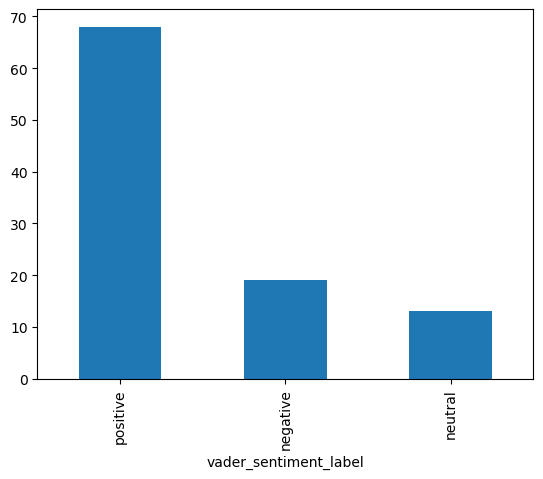

In [137]:
data['vader_sentiment_label'].value_counts().plot.bar()

In [138]:
transformer_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda:0


In [139]:
transformer_labels = []
for review in data['reviewText_clean'].values:
    sentiment_list = transformer_pipeline(review)
    sentiment_label = [sent['label'] for sent in sentiment_list]
    transformer_labels.append(sentiment_label)

You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


In [140]:
data['transformer_sentiment_label'] = transformer_labels
data.head()

,index,reviewText,rating,reviewText_clean,vader_sentiment_score,vader_sentiment_label,transformer_sentiment_label
0,11494,Clean and funny. A bit busy with all the diffe...,3,clean and funny a bit busy with all the differ...,0.7684,positive,[POSITIVE]
1,984,Alex a sexy hot cop and the PhD candidate. Wha...,4,alex a sexy hot cop and the phd candidate what...,0.9325,positive,[POSITIVE]
2,1463,Good thing that this is a free story. I read i...,1,good thing that this is a free story i read it...,0.6740,positive,[NEGATIVE]
3,10342,"Action, action, action! Equipment keeps gettin...",4,action action action equipment keeps getting b...,0.6652,positive,[NEGATIVE]
4,5256,this was hands down the worse book i have ever...,1,this was hands down the worse book i have ever...,-0.4767,negative,[NEGATIVE]


<Axes: xlabel='transformer_sentiment_label'>

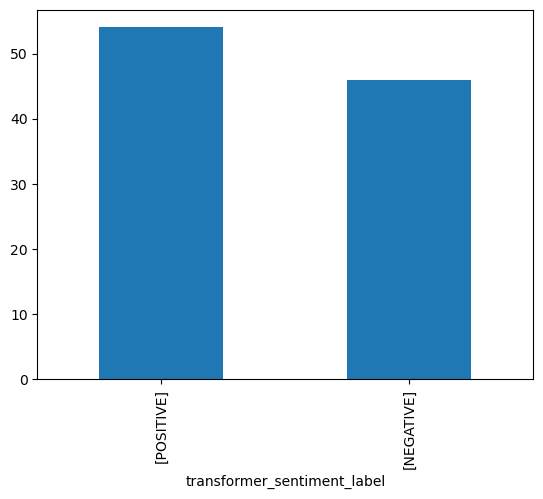

In [141]:
data['transformer_sentiment_label'].value_counts().plot.bar()

# 5-Vectorizing Text
Getting the text in the right format for Machine Learning.   
- BoW Model (Bag Of Words):  Counts wich of the words appear in wich of the documents    
- TF-IDF(TermFrequency InverseDocumentFrequency) :  Calculate the Importance of that word for that particular document, taking into account how that word appears into other documents

**1-BoW**

In [144]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

In [145]:
data = [' Most shark attacks occur about 10 feet from the beach since that is where the people are',
        'the efficiency with which he paired the socks in the drawer was quite admirable',
        'carol drank the blood as if she were a vampire',
        'giving directions that the mountains are to the west only works when you can see them',
        'the sign said there was road work ahead so he decided to speed up',
        'the gruff old man sat in the back of the bait shop grumbling to himself as he scooped out a handful of worms']

In [146]:
countvec = CountVectorizer()
countvec_fit = countvec.fit_transform(data)
bag_of_words = pd.DataFrame(countvec_fit.toarray(), columns = countvec.get_feature_names_out())
print(bag_of_words)

   10  about  admirable  ahead  are  as  attacks  back  bait  beach  ...  \
0   1      1          0      0    1   0        1     0     0      1  ...   
1   0      0          1      0    0   0        0     0     0      0  ...   
2   0      0          0      0    0   1        0     0     0      0  ...   
3   0      0          0      0    1   0        0     0     0      0  ...   
4   0      0          0      1    0   0        0     0     0      0  ...   
5   0      0          0      0    0   1        0     1     1      0  ...   

   were  west  when  where  which  with  work  works  worms  you  
0     0     0     0      1      0     0     0      0      0    0  
1     0     0     0      0      1     1     0      0      0    0  
2     1     0     0      0      0     0     0      0      0    0  
3     0     1     1      0      0     0     0      1      0    1  
4     0     0     0      0      0     0     1      0      0    0  
5     0     0     0      0      0     0     0      0      1    0 

**2-TF IDF**

In [148]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

In [149]:
data = [' Most shark attacks occur about 10 feet from the beach since that is where the people are',
        'the efficiency with which he paired the socks in the drawer was quite admirable',
        'carol drank the blood as if she were a vampire',
        'giving directions that the mountains are to the west only works when you can see them',
        'the sign said there was road work ahead so he decided to speed up',
        'the gruff old man sat in the back of the bait shop grumbling to himself as he scooped out a handful of worms']

In [150]:
tfidfvec = TfidfVectorizer()
tfidfvec_fit = tfidfvec.fit_transform(data)
tfidf_bag = pd.DataFrame(tfidfvec_fit.toarray(), columns = tfidfvec.get_feature_names_out())
print(tfidf_bag)

         10     about  admirable     ahead       are        as   attacks  \
0  0.257061  0.257061   0.000000  0.000000  0.210794  0.000000  0.257061   
1  0.000000  0.000000   0.293641  0.000000  0.000000  0.000000  0.000000   
2  0.000000  0.000000   0.000000  0.000000  0.000000  0.292313  0.000000   
3  0.000000  0.000000   0.000000  0.000000  0.222257  0.000000  0.000000   
4  0.000000  0.000000   0.000000  0.290766  0.000000  0.000000  0.000000   
5  0.000000  0.000000   0.000000  0.000000  0.000000  0.178615  0.000000   

      back     bait     beach  ...      were     west     when     where  \
0  0.00000  0.00000  0.257061  ...  0.000000  0.00000  0.00000  0.257061   
1  0.00000  0.00000  0.000000  ...  0.000000  0.00000  0.00000  0.000000   
2  0.00000  0.00000  0.000000  ...  0.356474  0.00000  0.00000  0.000000   
3  0.00000  0.00000  0.000000  ...  0.000000  0.27104  0.27104  0.000000   
4  0.00000  0.00000  0.000000  ...  0.000000  0.00000  0.00000  0.000000   
5  0.21782 

# 6-Topic Modeling : Discovering hidden topics within a set of documents
* takes individual pieces of text to identify the word patterns
* an example of unsupervised ml (unlabled data).     
* Examples : Categories in websites , Customer feedback/Reviews ,Social listening===> Saves too much time

**1-LDA : Latent Dirichlet Allocation**
*  An Iterative process
*  We specify the number of topics ,K

<img src="Capture.PNG">

In [154]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import gensim
import gensim.corpora as corpora

In [155]:
data = pd.read_csv("news_articles.csv") # data should be in the same folder as your notebook
data.head()

,id,title,content
0,25626,"One Weight-Loss Approach Fits All? No, Not Eve...","Dr. Frank Sacks, a professor of nutrition at H..."
1,19551,South Carolina Stuns Baylor to Reach the Round...,South Carolina’s win over Duke was not only ...
2,25221,"U.S. Presidential Race, Apple, Gene Wilder: Yo...",(Want to get this briefing by email? Here’s th...
3,18026,"His Predecessor Gone, Gambia’s New President F...","BANJUL, Gambia — A week after he was inaugu..."
4,21063,‘Harry Potter and the Cursed Child’ Goes From ...,The biggest book of the summer isn’t a blockbu...


In [156]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       100 non-null    int64 
 1   title    100 non-null    object
 2   content  100 non-null    object
dtypes: int64(1), object(2)
memory usage: 2.5+ KB


In [157]:
#Data Cleaning
# take just the content of the article, lowercase and remove punctuation
articles = data['content'].str.lower().apply(lambda x: re.sub(r"([^\w\s])", "", x))

# stop word removal
en_stopwords = stopwords.words('english')
articles = articles.apply(lambda x: ' '.join([word for word in x.split() if word not in (en_stopwords)]))

# tokenize
articles = articles.apply(lambda x: word_tokenize(x))

# stemming (we chose stemming for speed as we have a lot of text)
ps = PorterStemmer()
articles = articles.apply(lambda tokens: [ps.stem(token) for token in tokens])

In [158]:
articles

0     [dr, frank, sack, professor, nutrit, harvard, ...
1     [south, carolina, win, duke, surpris, fan, pos...
2     [want, get, brief, email, here, good, even, he...
3     [banjul, gambia, week, inaugur, anoth, countri...
4     [biggest, book, summer, isnt, blockbust, thril...
                            ...                        
95    [want, get, brief, email, here, good, even, he...
96    [tallinn, estonia, guard, brought, ahm, abdul,...
97    [gov, scott, walker, wisconsin, activ, wiscons...
98    [social, media, shook, emot, headlin, shout, n...
99    [moment, joanna, acevedo, first, set, foot, bo...
Name: content, Length: 100, dtype: object

* Vectorization (using a new method)

In [160]:
dictionary = corpora.Dictionary(articles)
print(dictionary)

Dictionary<8693 unique tokens: ['10', '100', '108', '15', '155']...>


In [161]:
doc_term = [dictionary.doc2bow(text) for text in articles]
print(doc_term)

[[(0, 1), (1, 1), (2, 1), (3, 2), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 2), (15, 1), (16, 1), (17, 2), (18, 1), (19, 1), (20, 3), (21, 3), (22, 1), (23, 3), (24, 2), (25, 4), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 2), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 2), (48, 2), (49, 1), (50, 2), (51, 2), (52, 1), (53, 1), (54, 2), (55, 1), (56, 2), (57, 6), (58, 1), (59, 1), (60, 1), (61, 4), (62, 2), (63, 1), (64, 1), (65, 2), (66, 1), (67, 1), (68, 1), (69, 1), (70, 5), (71, 4), (72, 1), (73, 1), (74, 1), (75, 2), (76, 2), (77, 1), (78, 2), (79, 2), (80, 1), (81, 1), (82, 1), (83, 4), (84, 2), (85, 1), (86, 1), (87, 3), (88, 1), (89, 3), (90, 1), (91, 2), (92, 3), (93, 6), (94, 1), (95, 1), (96, 1), (97, 1), (98, 1), (99, 1), (100, 1), (101, 1), (102, 1), (103, 2), (104, 5), (105, 1), (106, 2), (107, 1), (108, 1), (109, 3), (110, 4)

In [162]:
#applying LDA
num_topics = 2
lda_model = gensim.models.LdaModel(corpus=doc_term,
                                   id2word=dictionary,
                                   num_topics=num_topics)
#we chose 2 topics

In [163]:
lda_model.print_topics(num_topics=num_topics,num_words=5)
#for each topic 5 words

[(0,
  '0.018*"mr" + 0.014*"said" + 0.005*"trump" + 0.005*"would" + 0.005*"state"'),
 (1,
  '0.016*"mr" + 0.015*"said" + 0.006*"trump" + 0.005*"one" + 0.004*"would"')]

**2-LSA : Latent Semantic Analysis**
*  Distributional Hypothesis : words with similar meanings appear frequently together
*  Singular Value Decomposition (SVD) : recreates text documents into different vectos

<img src="SVD.PNG">

* SVD is a method of dimensionality reduction
* Similarities can be identified by : Clustering / Similarity Scores

In [167]:
from gensim.models import LsiModel

In [168]:
lsa_model = LsiModel(corpus=doc_term, id2word=dictionary , num_topics=num_topics)

In [169]:
print(lsa_model.print_topics(num_topics=num_topics, num_words=5))

[(0, '0.615*"mr" + 0.429*"said" + 0.187*"trump" + 0.130*"state" + 0.119*"would"'), (1, '-0.537*"mr" + -0.319*"trump" + 0.286*"said" + 0.242*"saudi" + 0.142*"weight"')]


In [170]:
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

* 1- Trains multiple LSI models with different numbers of topics (e.g., 2, 3, ..., 10)
* 2- Evaluates each model's coherence score
* 3- Stores all models and their scores for later use — such as choosing the best number of topics
* => You can later plot coherence_values vs num_topics_i to see which number of topics gives the most meaningful and interpretable result.

In [ ]:
coherence_values=[]
model_list = []
min_topics = 2 
max_topics = 11
# Loop over a range of topic numbers (e.g., from 2 to 10)
for num_topics_i in range(min_topics, max_topics + 1):
    # Train an LSI (Latent Semantic Indexing) model with 'num_topics_i' topics
    model = LsiModel(corpus=doc_term, id2word=dictionary, num_topics=num_topics_i)
    # Save the trained model to a list for later use or comparison
    model_list.append(model)
    # Build a coherence model for evaluation (how "understandable" or "human-readable" the topics are)
    coherence_model = CoherenceModel(
        model=model,            # the LSI model we just trained
        texts=articles,         # the original preprocessed texts (tokenized)
        dictionary=dictionary,  # the same dictionary used to train the model
        coherence='c_v'         # use the 'c_v' coherence metric (a common choice for topic modeling)
    )
    # Compute the coherence score and store it in a list for comparison
    coherence_values.append(coherence_model.get_coherence())

In [ ]:
plt.plot(range(min_topics, max_topics+1), coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

* => we chose the number 3 since it has the highest coherence score

In [ ]:
final_n_topics = 3
lsamodel_f = LsiModel(doc_term, num_topics=final_n_topics, id2word = dictionary) 
print(lsamodel_f.print_topics(num_topics=final_n_topics, num_words=5))

# 7-Custom Text Classifier
* classifying text using custom labels to create a custom classifier
* supervised machine learning problem
* Logistic Regression / Naive Bayes / Linear SVM (support vector machine)

<img src="Logistic-Regression-Machine-Learning.jpg">
<img src="naiveBayes.png">
<img src="SVM.png">

In [2]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [4]:
data = pd.DataFrame([("i love spending time with my friends and family", "positive"),
                     ("that was the best meal i've ever had in my life", "positive"),
                     ("i feel so grateful for everything i have in my life", "positive"),
                     ("i received a promotion at work and i couldn't be happier", "positive"),
                     ("watching a beautiful sunset always fills me with joy", "positive"),
                     ("my partner surprised me with a thoughtful gift and it made my day", "positive"),
                     ("i am so proud of my daughter for graduating with honors", "positive"),
                     ("listening to my favorite music always puts me in a good mood", "positive"),
                     ("i love the feeling of accomplishment after completing a challenging task", "positive"),
                     ("i am excited to go on vacation next week", "positive"),
                     ("i feel so overwhelmed with work and responsibilities", "negative"),
                     ("the traffic during my commute is always so frustrating", "negative"),
                     ("i received a parking ticket and it ruined my day", "negative"),
                     ("i got into an argument with my partner and we're not speaking", "negative"),
                     ("i have a headache and i feel terrible", "negative"),
                     ("i received a rejection letter for the job i really wanted", "negative"),
                     ("my car broke down and it's going to be expensive to fix", "negative"),
                     ("i'm feeling sad because i miss my friends who live far away", "negative"),
                     ("i'm frustrated because i can't seem to make progress on my project", "negative"),
                     ("i'm disappointed because my team lost the game", "negative")
                    ],
                    columns=['text', 'sentiment'])

In [12]:
#data shuffling (nice mix of positive and negative sentiments)
data = data.sample(frac=1).reset_index(drop=True)

In [14]:
#data and label
X = data['text']
y = data['sentiment']

In [40]:
#text vectorization 
countvec= CountVectorizer()
countvec_fit = countvec.fit_transform(X)
bag_of_words = pd.DataFrame(countvec_fit.toarray(), columns = countvec.get_feature_names_out())
bag_of_words

,accomplishment,after,always,am,an,and,argument,at,away,be,...,vacation,ve,wanted,was,watching,we,week,who,with,work
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7,0,0,0,0,1,1,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
8,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [42]:
# split into train(with vectorized data) and test data 
X_train, X_test, y_train, y_test = train_test_split(bag_of_words, y, test_size=0.3, random_state = 7)

**1- Logistic regression :**

In [48]:
lr = LogisticRegression(random_state=1).fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
accuracy_score(y_pred_lr, y_test)

0.3333333333333333

* ->very low accuarcy

In [51]:
print(classification_report(y_test, y_pred_lr, zero_division=0))

              precision    recall  f1-score   support

    negative       0.33      0.33      0.33         3
    positive       0.33      0.33      0.33         3

    accuracy                           0.33         6
   macro avg       0.33      0.33      0.33         6
weighted avg       0.33      0.33      0.33         6



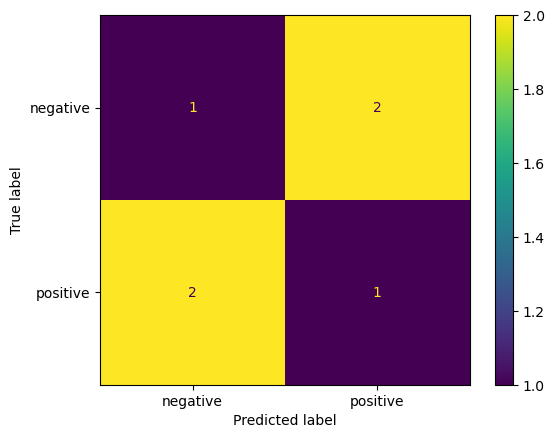

In [76]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(lr, X_test, y_test)

**2- Nai :**

In [55]:
from sklearn.naive_bayes import MultinomialNB

In [61]:
nb = MultinomialNB().fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
accuracy_score(y_pred_nb, y_test)

0.6666666666666666

In [65]:
print(classification_report(y_test, y_pred_nb, zero_division=0))

              precision    recall  f1-score   support

    negative       0.60      1.00      0.75         3
    positive       1.00      0.33      0.50         3

    accuracy                           0.67         6
   macro avg       0.80      0.67      0.62         6
weighted avg       0.80      0.67      0.62         6



**3-Linear Support Vector Machine**

In [89]:
from sklearn.linear_model import SGDClassifier

In [87]:
svm = SGDClassifier().fit(X_train, y_train)
# possible hyper params, loss function, regularization

In [91]:
y_pred_svm = svm.predict(X_test)

In [93]:
accuracy_score(y_pred_svm, y_test)

0.6666666666666666

In [121]:
print(classification_report(y_test, y_pred_svm, zero_division=0))

              precision    recall  f1-score   support

    negative       0.60      1.00      0.75         3
    positive       1.00      0.33      0.50         3

    accuracy                           0.67         6
   macro avg       0.80      0.67      0.62         6
weighted avg       0.80      0.67      0.62         6

